In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor,\
RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder,Binarizer
import time
from sklearn.grid_search import GridSearchCV
from sklearn import ensemble
from scipy import stats
import missingno as msno
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('./Bike-Sharing-Dataset/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data['dteday'] = pd.to_datetime(data['dteday'],infer_datetime_format=True)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [6]:
# data.isnull().sum() 

In [7]:
# data.info()

In [8]:
data.rename(columns= {'instant':'id',
                        'dteday':'datetime',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [9]:
categoryVariableList = ["weekday",
                        "month",
                        "season",
                        "weather",
                        "holiday",
                        "workingday"]

for var in categoryVariableList:
    data[var] = data[var].astype("category")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
id            17379 non-null int64
datetime      17379 non-null datetime64[ns]
season        17379 non-null category
year          17379 non-null int64
month         17379 non-null category
hour          17379 non-null int64
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weather       17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
dtypes: category(6), datetime64[ns](1), float64(4), int64(6)
memory usage: 1.6 MB


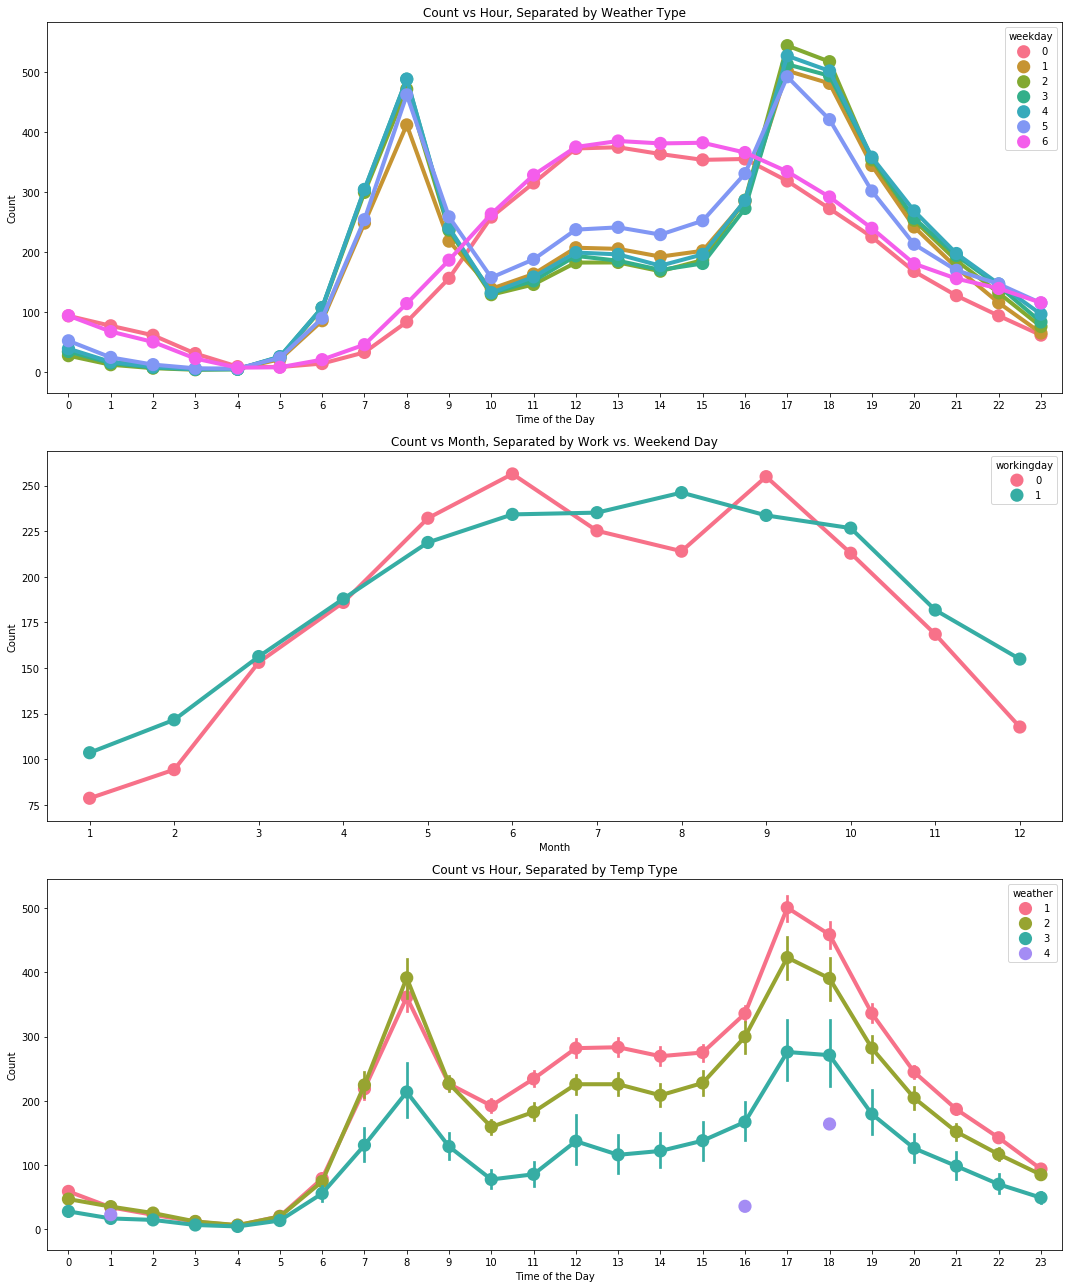

In [11]:

fig,axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 18)

day_of_week = data.groupby(['weekday', 'hour'], sort=True).mean().reset_index()
sns.pointplot(x='hour', y='count', data=day_of_week, hue='weekday', join=True, ax=axes[0], scale=1.5, palette='husl')
axes[0].set(xlabel='Time of the Day', ylabel='Count', title='Count vs Hour, Separated by Weather Type')


yearly_workingday = data.groupby(['workingday', 'month'], sort=True).mean().reset_index()
sns.pointplot(x='month', y='count', data=yearly_workingday, hue='workingday', join=True, ax=axes[1], scale=1.5, palette='husl')
axes[1].set(xlabel='Month', ylabel='Count', title='Count vs Month, Separated by Work vs. Weekend Day')


hourly_temp = data.groupby(['weather', 'hour'], sort=True).mean().reset_index()
sns.pointplot(x='hour', y='count', data=data, hue='weather', join=True, ax=axes[2], scale=1.5, palette='husl')
axes[2].set(xlabel='Time of the Day', ylabel='Count', title='Count vs Hour, Separated by Temp Type')
plt.savefig('count vs xyz')
plt.tight_layout() 

In [354]:
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

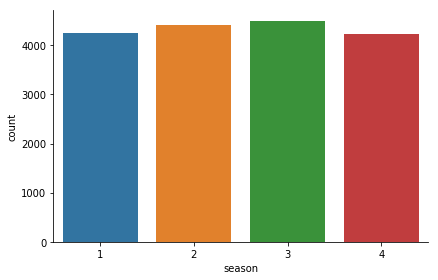

In [355]:
sns.factorplot(x='season',data=data,kind='count',size=4,aspect=1.5)

In [356]:
data.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

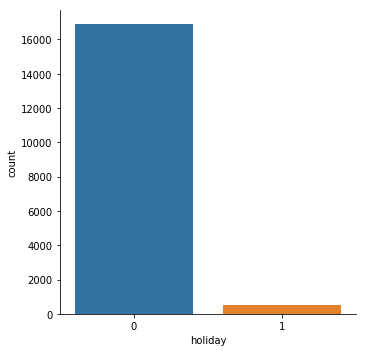

In [441]:
sns.factorplot(x='holiday',data=data,kind='count',size=5,aspect=1)
plt.savefig('holiday-vs-count.png')

In [358]:
data.workingday.value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

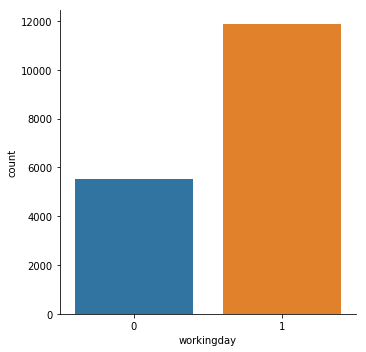

In [442]:
sns.factorplot(x='workingday',data=data,kind='count',size=5,aspect=1) # majority of data 
plt.savefig('working_day-vs-count.png')

In [360]:
data.weather.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather, dtype: int64

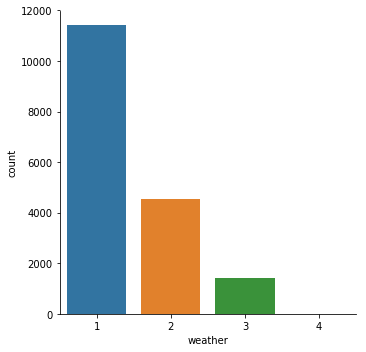

In [443]:
sns.factorplot(x='weather',data=data,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter
plt.savefig('weather-vs-count.png')

In [362]:
season=pd.get_dummies(data['season'],prefix='season')
data=pd.concat([data,season],axis=1)
weather=pd.get_dummies(data['weather'],prefix='weather')
data=pd.concat([data,weather],axis=1)

data.drop(['season','weather'],inplace=True,axis=1)
data.head()

,id,datetime,year,month,hour,holiday,weekday,workingday,temp,atemp,...,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,...,13,16,1,0,0,0,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,...,32,40,1,0,0,0,1,0,0,0
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,...,27,32,1,0,0,0,1,0,0,0
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,...,10,13,1,0,0,0,1,0,0,0
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,...,1,1,1,0,0,0,1,0,0,0


now most importantly split the date and time as the time of day is expected to effect the no of bikes. for eg at office hours like early mornning or evening one would expect a greater demand of rental bikes.


In [364]:
data.drop('datetime',axis=1,inplace=True)
data.drop('id',axis=1,inplace=True)
data.head()

,year,month,hour,holiday,weekday,workingday,temp,atemp,humidity,windspeed,...,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,...,13,16,1,0,0,0,1,0,0,0
1,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,...,32,40,1,0,0,0,1,0,0,0
2,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,...,27,32,1,0,0,0,1,0,0,0
3,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,...,10,13,1,0,0,0,1,0,0,0
4,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,...,1,1,1,0,0,0,1,0,0,0


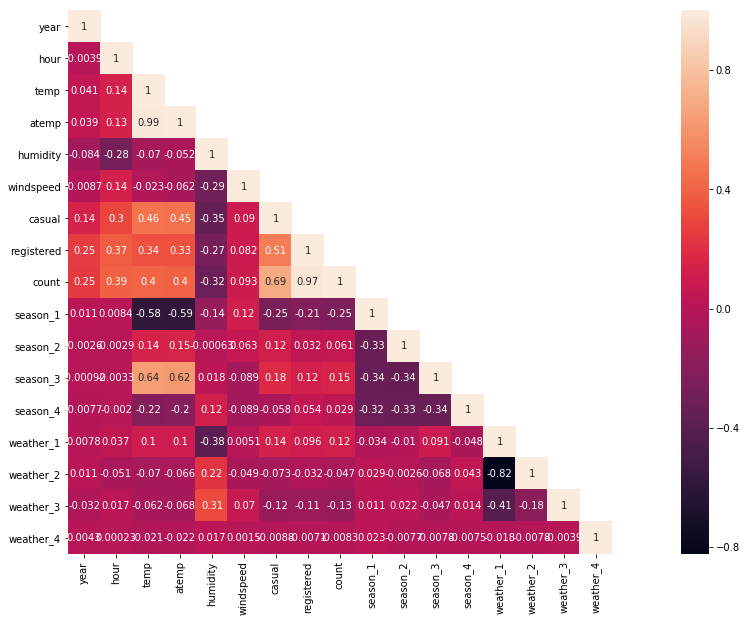

In [365]:
cor_mat= data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(25,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [366]:
data.drop(['casual','registered','year'],axis=1,inplace=True)

In [368]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('count',axis=1),
                                               data['count'],test_size=0.25,random_state=42)

In [370]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [371]:
reg.predict(x_test)

array([405.48262928, 152.57960207,  98.5535591 , ...,  84.07444621,
       168.21510474, 148.45720693])

In [372]:
reg.score(x_test,y_test)

0.3522976672643525

In [373]:
reg.score(x_train,y_train)

0.35064167893924914

In [385]:
models=[RandomForestRegressor(),AdaBoostRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor']
MAE=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    MAE.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'MAE':MAE}   
print(d)

{'Modelling Algo': ['RandomForestRegressor', 'AdaBoostRegressor'], 'MAE': [0.42985490954406597, 1.004478560417003]}


In [386]:
MAE =pd.DataFrame(d)
MAE

,Modelling Algo,MAE
0,RandomForestRegressor,0.429855
1,AdaBoostRegressor,1.004479


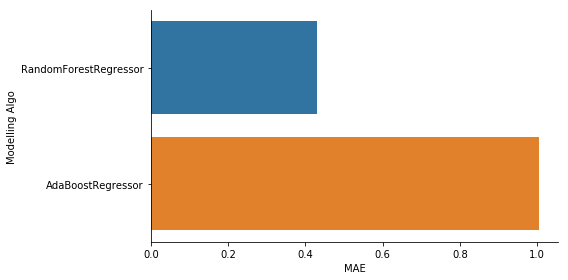

In [412]:
sns.factorplot(y='Modelling Algo',x='MAE',data=MAE,kind='bar',size=4,aspect=2)

In [388]:
params = {'n_estimators': 500,
          'max_depth': 4, 
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [389]:
clf.fit(x_train, y_train)
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

MSE: 6223.5932


### More plots 

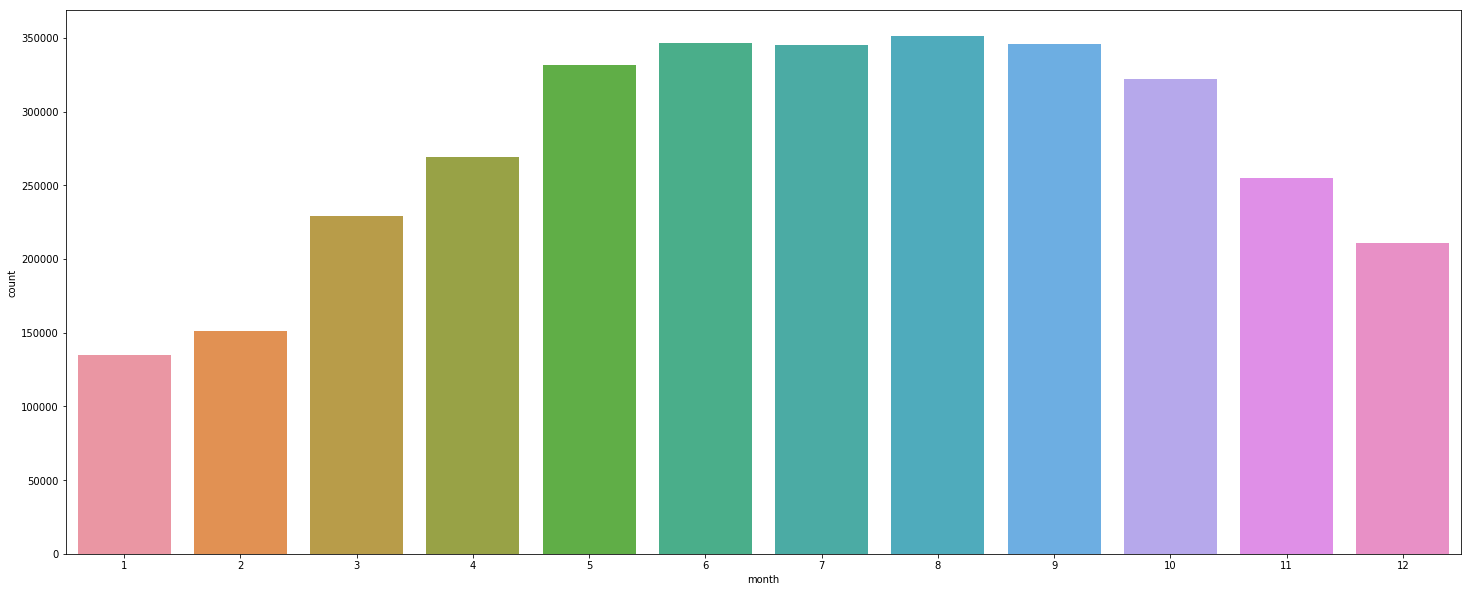

In [454]:
plt.figure(figsize=(25,10))
group_mn = data.groupby(['month'])['count'].sum().reset_index()
ax = sns.barplot(x = group_mn['month'], y = group_mn['count'])
ax.set(xlabel='month', ylabel='count')
plt.savefig('month-vs-count.png')
plt.show()

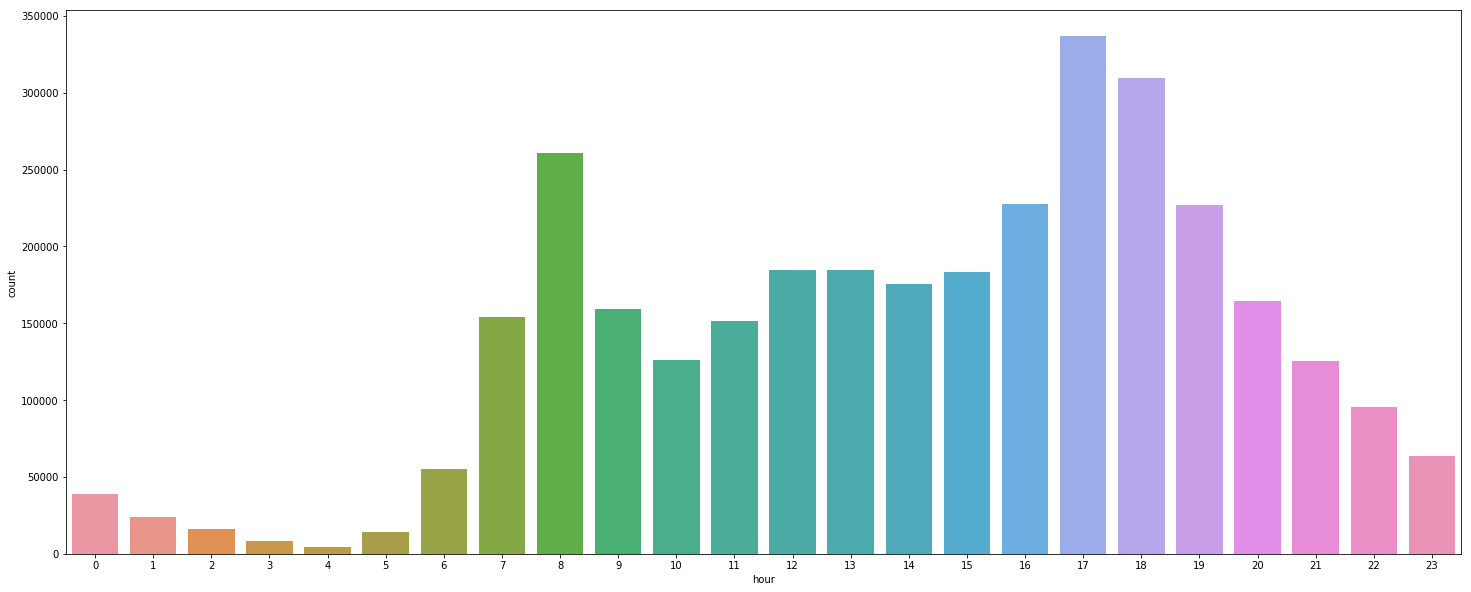

In [455]:
plt.figure(figsize=(25,10))
group_hr = data.groupby(['hour'])['count'].sum().reset_index()
ax = sns.barplot(x = group_hr['hour'], y = group_hr['count'])
ax.set(xlabel='hour', ylabel='count')
plt.savefig('hour-vs-count')
plt.show()

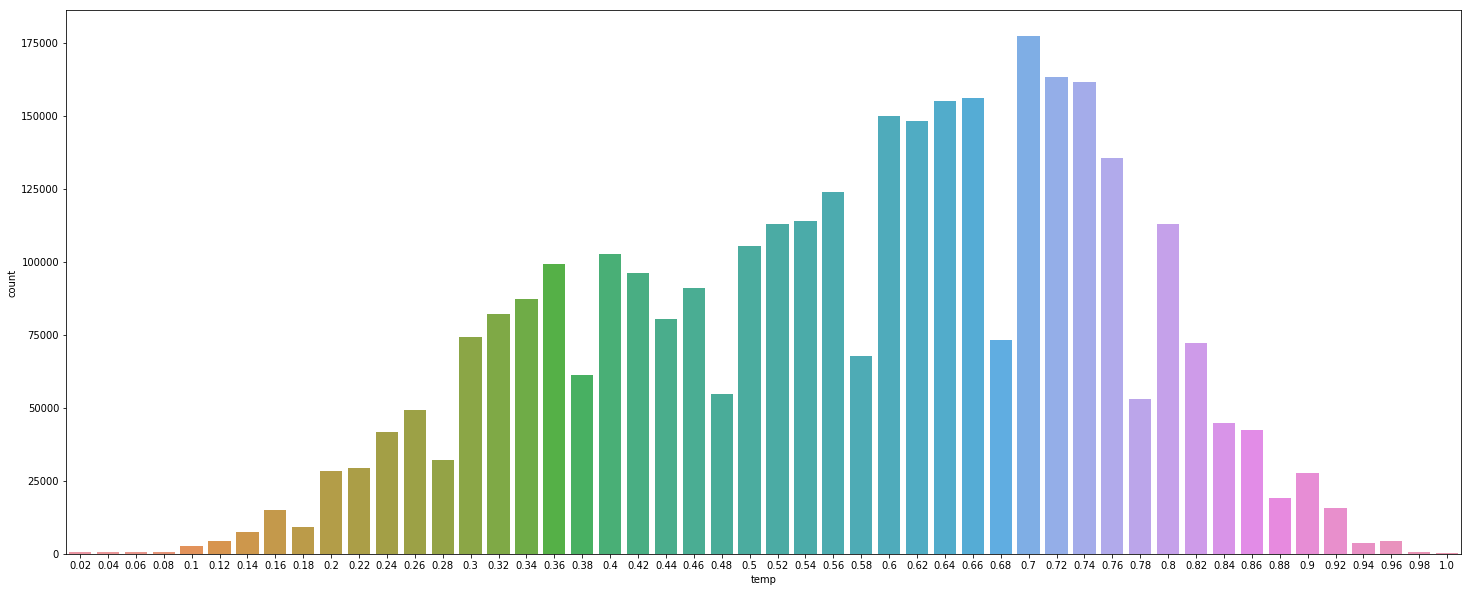

In [456]:
plt.figure(figsize=(25,10))
group_season = data.groupby(['temp'])['count'].sum().reset_index()
ax = sns.barplot(x = group_season['temp'], y = group_season['count'])
ax.set(xlabel='temp', ylabel='count')
plt.savefig('temp-vs-count.png')
plt.show()

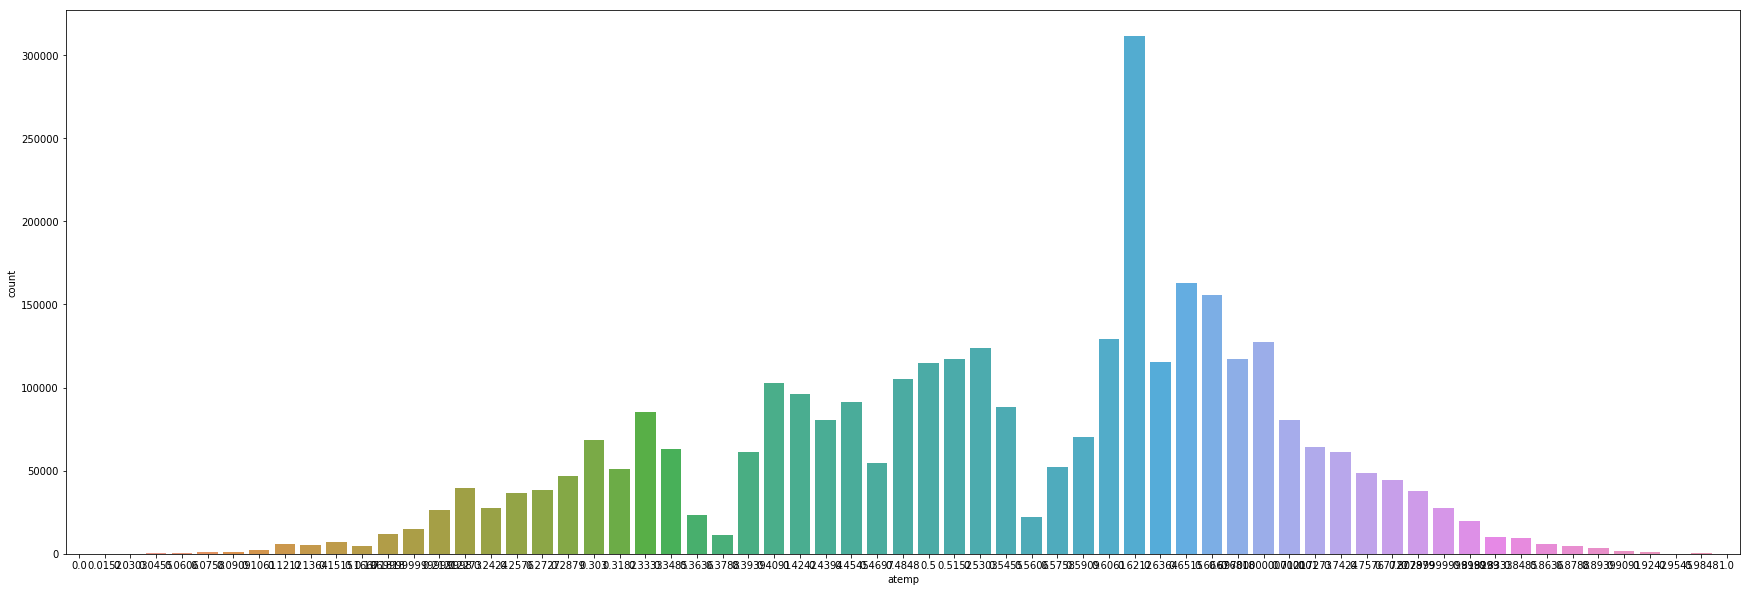

In [94]:
plt.figure(figsize=(30,10))
group_season = data.groupby(['atemp'])['count'].sum().reset_index()
ax = sns.barplot(x = group_season['atemp'], y = group_season['count'])
ax.set(xlabel='atemp', ylabel='count')
plt.show()

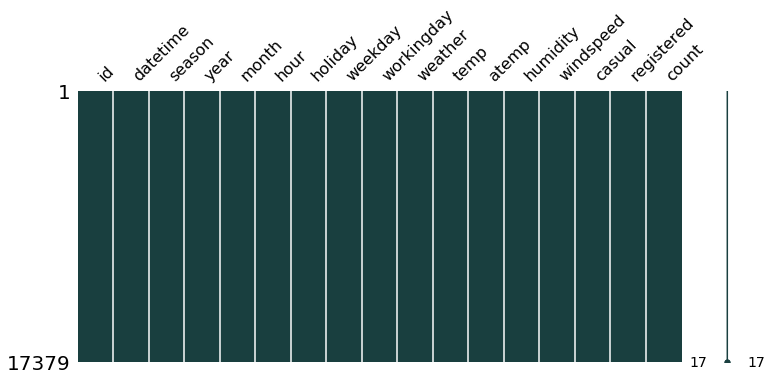

In [447]:
msno.matrix(data,figsize=(12,5),color=(0.10,0.25,0.25))
plt.savefig('missing_values.png')

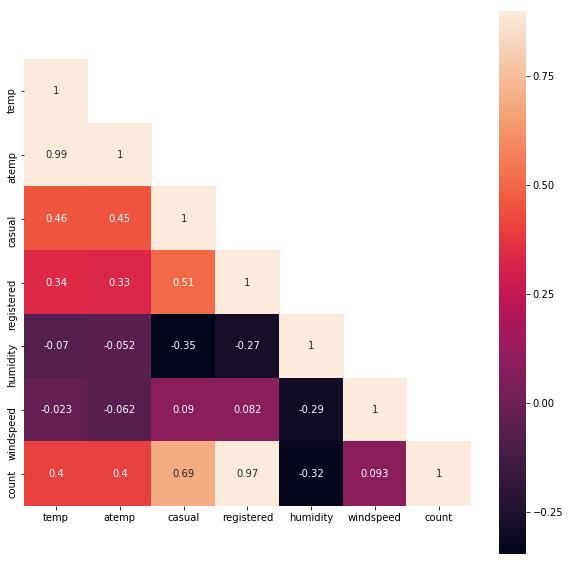

In [449]:
corrMatt = data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMatt, mask=mask,vmax=0.9, square=True,annot=True)
plt.savefig('corelation_mat.png')

INFERENCES FROM THE ABOVE HEATMAP--
self realtion i.e. of a feature to itself is equal to 1 as expected.

temp and atemp are highly related as expected.

humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

also note that casual and working day are highly inversely related as you would expect.

Also note that count and holiday are highly inversely related as you would expect.

Also note that temp(or atemp) highly effects the count.

Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

similarly we can draw some more inferences like weather and humidity and so on... .